In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats

#### <font color='yellow'>Общий разведочный анализ, валидация и очистка данных:</font>

In [2]:
df = pd.read_csv('/Users/user/Downloads/megafon.csv')

In [3]:
df.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


In [4]:
# Начнем очистку и нормализацию данных
df.groupby('Q1').count()

,user_id,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
Q1,,,,,,,,,,
***** ** ***,1,0,1,1,1,1,1,1,1,1
0,10,0,10,10,10,10,10,10,10,10
"0, 1, 5",1,0,1,1,1,1,1,1,1,1
1,532,333,532,532,532,532,532,532,532,532
"1, 3",2,0,2,2,2,2,2,2,2,2
"1, 6",1,0,1,1,1,1,1,1,1,1
"1, 8",1,0,1,1,1,1,1,1,1,1
10,846,0,846,846,846,846,846,846,846,846
"10, 5",1,0,1,1,1,1,1,1,1,1


In [5]:
# находим nan значения в Q1 и удаляем их
df = df.drop(df[df['Q1'].isnull()].index)

In [6]:
# удаляем некорректные значения Q1
df = df.loc[df[df['Q1'].str.isnumeric()].index]

In [7]:
# убираем некорректные значения в Q1
df['Q1'] = df['Q1'].astype(int)
df = df.drop(df[df['Q1'] > 10].index)
df = df.drop(df[df['Q1'] <= 0].index)

In [8]:
# Разделим данные на 2 группы: те кто удовлетворен качеством связи(ответы 9-10) и кто не удовлетворен(ответы 1-8)

In [9]:
bins = [0, 8, 10]

df['quality'] = pd.cut(df['Q1'], bins=bins, labels=["bad", "good"])

In [10]:
df.groupby('quality').count()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
quality,,,,,,,,,,,
bad,1974,1974,1315,1974,1974,1974,1974,1974,1974,1974,1974
good,1084,1084,0,1084,1084,1084,1084,1084,1084,1084,1084


In [11]:
# Заменим значения Nan на 0
value= {'Q2':'0'}
df = df.fillna(value)

In [12]:
# убираем 0-e значения в Q2 только для группы bad
df = df.drop(df[(df['quality'] == 'bad') & (df['Q2'] == '0')].index)

In [13]:
df.groupby('quality').count()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
quality,,,,,,,,,,,
bad,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314
good,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084


In [14]:
# нормализуем  данные в Q2 (избавимся от запятых в ответах и сделаем одно значение ответа в строке)
df['Q2'] = df['Q2'].str.split(pat=",", n=5)

In [15]:
df[['Q1','Q2']].head(10)

,Q1,Q2
1,5,[4]
2,1,[4]
3,8,[3]
4,2,"[2, 3, 4]"
6,2,"[4, 5]"
7,9,[0]
8,1,"[1, 3, 4]"
9,3,"[1, 3, 4, 5]"
10,3,"[1, 3]"
13,10,[0]


In [16]:
df = df.explode('Q2').reset_index().drop('index', axis=1)

In [17]:
df.groupby('Q2').count()

,user_id,Q1,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),quality
Q2,,,,,,,,,,,
05,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1
2,140,140,140,140,140,140,140,140,140,140,140
27,1,1,1,1,1,1,1,1,1,1,1
3,370,370,370,370,370,370,370,370,370,370,370
34,1,1,1,1,1,1,1,1,1,1,1
4,424,424,424,424,424,424,424,424,424,424,424
5,211,211,211,211,211,211,211,211,211,211,211
6,3,3,3,3,3,3,3,3,3,3,3


In [18]:
def union(x):
    ### функция для удаления пробелов в значениях
    return x.replace(' ', '')

In [19]:
df['Q2'] = df['Q2'].astype(str).apply(union)

In [20]:
df.groupby('Q2').count()

,user_id,Q1,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),quality
Q2,,,,,,,,,,,
0,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087
05,1,1,1,1,1,1,1,1,1,1,1
1,647,647,647,647,647,647,647,647,647,647,647
10,1,1,1,1,1,1,1,1,1,1,1
2,184,184,184,184,184,184,184,184,184,184,184
27,1,1,1,1,1,1,1,1,1,1,1
3,705,705,705,705,705,705,705,705,705,705,705
34,1,1,1,1,1,1,1,1,1,1,1
4,625,625,625,625,625,625,625,625,625,625,625


In [21]:
# удаляем строки с некорректными значениями(4 строки)
dfq = df[(df['Q2'] == '05') | (df['Q2'] == '10') | (df['Q2'] == '27') | (df['Q2'] == '34')]
df = df.drop(dfq.index)

In [22]:
df.groupby('Q2').count()

,user_id,Q1,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),quality
Q2,,,,,,,,,,,
0,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087
1,647,647,647,647,647,647,647,647,647,647,647
2,184,184,184,184,184,184,184,184,184,184,184
3,705,705,705,705,705,705,705,705,705,705,705
4,625,625,625,625,625,625,625,625,625,625,625
5,221,221,221,221,221,221,221,221,221,221,221
6,13,13,13,13,13,13,13,13,13,13,13
7,86,86,86,86,86,86,86,86,86,86,86


In [23]:
df.groupby('quality').count()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
quality,,,,,,,,,,,
bad,2484,2484,2484,2484,2484,2484,2484,2484,2484,2484,2484
good,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084


In [24]:
df['Q2'] = df['Q2'].astype(int)

In [25]:
# удалим нулевые значения в группе bad  столбца Q2
df =  df.drop(df[(df['quality'] == 'bad') & (df['Q2'] == 0)].index)

In [26]:
# изменим категориальные значения столбца "quality" на цифровые значения
mapping = {"good": 1, "bad": 0}
df['quality'] = df['quality'].map(mapping)

In [27]:
df['quality'] = df['quality'].astype(int)

#### <font color='yellow'>Для выявления коррелирующих признаков в датафрейме построим матрицу корреляции признаков и визуализируем полученную матрицу для визуальной оценки коррелирующих признаков.</font>

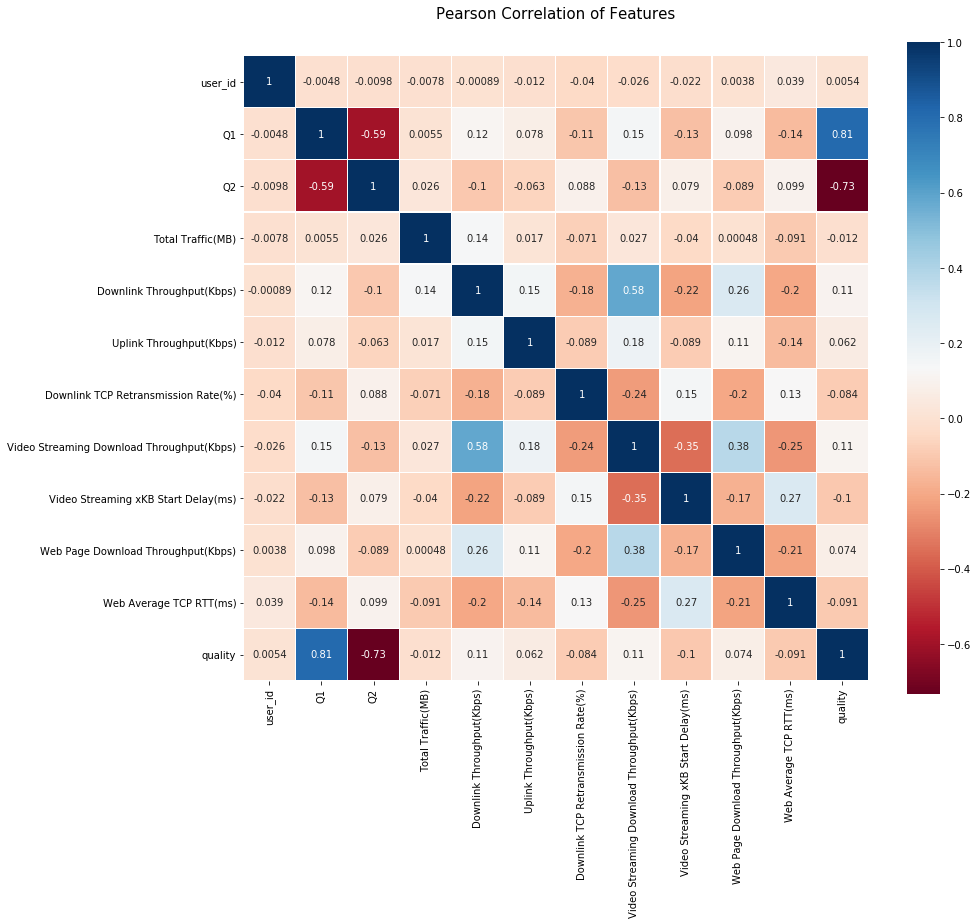

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

#### <font color='yellow'>Наиболее коррелирующими признаками с целевым признаком 'quality' являются:</font>

##### "Video Streaming Download Throughput(Kbps" - скорость загрузки видео

##### "Downlink Throughput(Kbps)" - скорость скачивания

##### Исследуем зависимость этих признаков и целевого признака 'quality'

#### <font color='yellow'>Сформулируем гипотезы для исследования данных признаков:</font>

#### <font color='orange'>Гипотеза 1:<font> 

#### <font color='orange'>Уровень удовлетворенности качеством связи зависит от скорости загрузки видео (Video Streaming Download Throughput(Kbps)<font>

In [29]:
# разделим данные на 2 группы по значению целевого признака "quality"
df_good = df[df['quality'] == 1].reset_index().drop('index',axis=1)
df_bad = df[df['quality'] == 0].reset_index().drop('index',axis=1)

In [30]:
# отфильтруем значения вопросов в столбце Q2 группы bad по значению признаков так чтобы остались только ответ на вопрос, который
# можно соотнести с признаками(то есть ответ 5 - медленная загрузка видео )
df_bad = df_bad[df_bad['Q2'] == 5]

In [31]:
df_bad.shape, df_good.shape

((221, 12), (1084, 12))

In [32]:
# уравняем значения выборок
df_good = df_good.loc[0:220]

In [33]:
df_good.shape

(221, 12)

In [34]:
# функция, которая создает две группы для исследования по заданному признаку 
def df_metric(col_name):
    good = df_good[col_name].to_frame().reset_index().drop('index',axis=1).rename(columns={col_name : 'good'})
    bad = df_bad[col_name].to_frame().reset_index().drop('index',axis=1).rename(columns={col_name : 'bad'})
    df = good.merge(bad, how='left', left_index=True, right_index=True)
    return df

In [35]:
df_video = df_metric('Video Streaming Download Throughput(Kbps)')

In [36]:
# размерность групп до начала исследования
df_video.shape

(221, 2)

In [37]:
# Исследуем метрику 'Скорость загрузки видео' группы 'good' (абоненты удовлетворенные качеством связи)

In [38]:
# функция графика распределения метрики
def hist(col):
    fig, ax = plt.subplots(1,1,figsize = (10,5))
    ax.hist(col)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f'Histigram of "{col.name}" groop')
    plt.xlabel('Values')
    plt.ylabel('Frecuency')
    return plt.show()

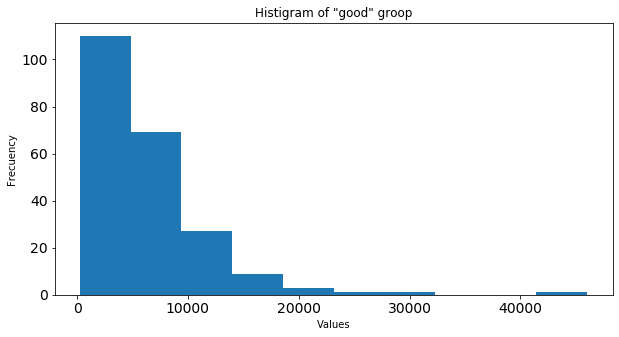

In [39]:
# Распределение метрики асимметричное
hist(df_video['good'])

In [40]:
# Функция описания метрики
def describe(col):
    return col.describe()

In [41]:
describe(df_video['good'])

count      221.000000
mean      6277.953982
std       5540.570739
min        262.270000
25%       2627.680000
50%       4884.890000
75%       7971.830000
max      46035.650000
Name: good, dtype: float64

In [42]:
# Функция графика поиска аномальных значений
def anomal_values(col):
    fig, ax = plt.subplots(1,1,figsize = (5,5))
    ax.boxplot(col)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Plot search abnormal values "{col.name}" groop')
    plt.xlabel(col.name)
    plt.ylabel('Values')
    print('abnormal values > ', np.percentile(col, 95))
    return plt.show()

abnormal values >  15083.35


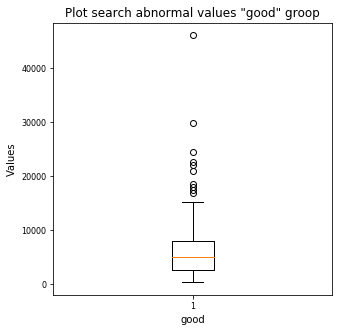

In [43]:
anomal_values(df_video['good'])

In [44]:
# Исследуем метрику 'Скорость загрузки видео' группы 'bad' (абоненты не удовлетворенные качеством связи)

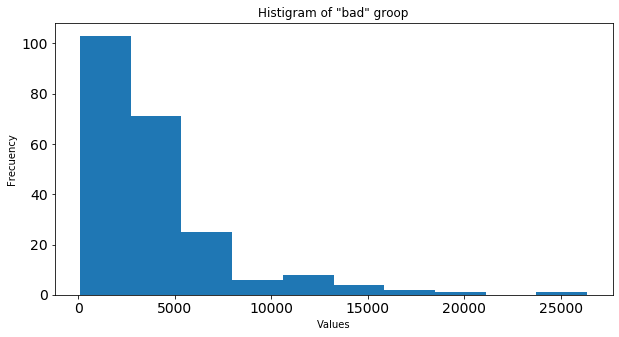

In [45]:
hist(df_video['bad'])

In [46]:
# описание метрики группы bad
describe(df_video['bad'])

count      221.000000
mean      3942.152986
std       3829.497067
min         87.340000
25%       1490.890000
50%       2906.820000
75%       4624.360000
max      26367.730000
Name: bad, dtype: float64

abnormal values >  12152.42


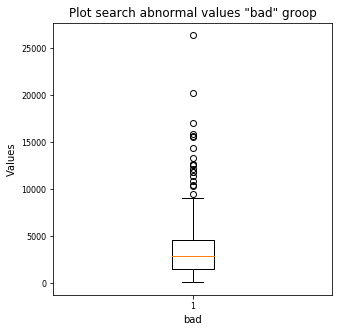

In [47]:
# Исследуем метрику нруппы bad на аномальные значения:
anomal_values(df_video['bad'])

In [48]:
# функция удаления аномальных значений в данных
def anom_del(df,col1,col2):
    df = df[(col1 < np.percentile(col1, 95)) & (col2 < np.percentile(col2, 95))]
    return df

In [49]:
# удалим аномальные значения в данных 
df_video = anom_del(df_video, df_video['good'], df_video['bad'])

In [50]:
# Размерность выборок
df_video.shape

(198, 2)

In [51]:
# функция бутстрепа
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [52]:
# применим функцию бутстрепа так как распределение выборок несимметричное и мал размер выборок
samples_good = bootstrap(df_video['good'], N_TRIAL=3000, func=np.mean)
samples_bad = bootstrap(df_video['bad'],  N_TRIAL=3000, func=np.mean)

In [53]:
# Функция визуализации гистограмм распределения и доверительных интервалов метрики обеих групп
def interval(col1,col2):
    ax = sns.distplot(col1,label = 'good')
    sns.distplot(col2,ax = ax,label = 'bad')
    ax.legend(['good','bad'],  bbox_to_anchor=(1.2, 1))
    
    ax.axvline(np.percentile(col1,2.5),linestyle = '-',color='r')
    ax.axvline(np.percentile(col1,97.5),linestyle = '-',color='g')

    ax.axvline(np.percentile(col2,2.5),linestyle = '--',color='r')
    ax.axvline(np.percentile(col2,97.5),linestyle = '--',color='g')
    
    plt.title(f'Histigram of bootstrap, confidence intervals\n both research groop')
    plt.xlabel('Values')
    plt.ylabel('Frecuency')
    return plt.show()

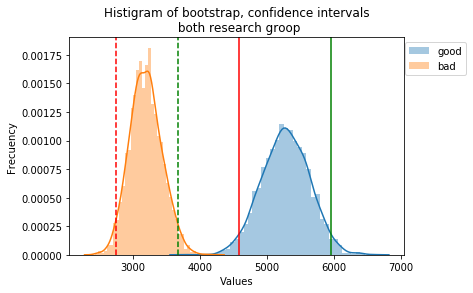

In [54]:
interval(samples_good, samples_bad)

In [55]:
# функция разницы средних 
def average_difference(col1, col2):
    buf = []
    for i in range(1000):
        good_sample = np.random.choice(col1,len(col1))
        bad_sample = np.random.choice(col2, len(col2))
        buf.append(np.mean(bad_sample) - np.mean(good_sample)) 
    ax_buf = sns.distplot(buf)
    ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
    ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
    plt.title(f'Histogram of average difference\n both research groop')
    plt.xlabel('Values')
    plt.ylabel('Frecuency')
    print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))
    return plt.show()

min = -2684.3202108585847 max = -1490.633457070707


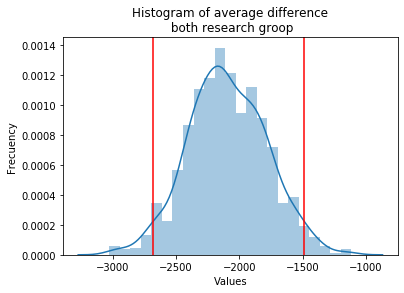

In [56]:
average_difference(df_video['good'],df_video['bad'])

In [57]:
# функция поиска p_value  через критерий Манна-Уитни
def p_value(col1,col2):
    stat, p_value = stats.mannwhitneyu(col1, col2)
    return p_value

In [58]:
p_value(df_video['good'], df_video['bad'])

3.2889617327012214e-10

In [59]:
round(df_video['good'].mean()/df_video['bad'].mean()*100 - 100,2)

65.45

##### <font color='orange'>Доверительные интервалы выборок не пересекаются, , p_value = 3.29e-10 при уровне значимости 0.05. А также при разнице средних ноль не входит в доверительный интервал. Исходя из вышеизложенного следует вывод:<font>

#### <font color='orange'>Гипотеза, о том что уровень удовлетворенности качеством связи зависит от скорости загрузки видео подтверждается. Между исследуемыми группами есть статистически значимые различия.. У абонентов удовлетворенных качеством связи скорость загрузки видео в среднем 65.45% выше чем у абонентов не удовлетворенных качеством связи и оставившими негативную оценку о скорости загрузки видео<font>

#### <font color='orange'>Гипотеза 2:<font>

#### <font color='orange'>Уровень удовлетворенности качеством связи зависит от средней скорости интернета.<font>

In [60]:
# разделим данные на 2 группы по значению целевого признака "quality"
df_good = df[df['quality'] == 1].reset_index().drop('index',axis=1)
df_bad = df[df['quality'] == 0].reset_index().drop('index',axis=1)

In [61]:
# отфильтруем значения вопросов в столбце Q2 группы bad по значению признаков так чтобы остались только ответ на вопрос, который
# можно соотнести с признаками(то есть ответ 4 - медленный интернет )
df_bad = df_bad[df_bad['Q2'] == 4]

In [62]:
df_bad.shape

(625, 12)

In [63]:
df_good.shape

(1084, 12)

In [64]:
# уравняем значения выборок
df_good = df_good.loc[0:624]

In [65]:
df_good.shape

(625, 12)

In [66]:
#  Показатель средней скорости интернета примем как отношение средней скорости скачивания
# и средней скорости загрузки (Downlink Throughput(Kbps)/Uplink Throughput(Kbps))

In [67]:
df_good['Mean_speed'] = df_good['Downlink Throughput(Kbps)']/df_good['Uplink Throughput(Kbps)']

In [68]:
df_bad['Mean_speed'] = df_bad['Downlink Throughput(Kbps)']/df_bad['Uplink Throughput(Kbps)']

In [69]:
# создадим две группы для исследования по заданному признаку
df_dlink = df_metric('Mean_speed')

In [70]:
# Исследуем метрику 'Средняя скорость скачивания' группы 'good' (абоненты удовлетворенные качеством связи)

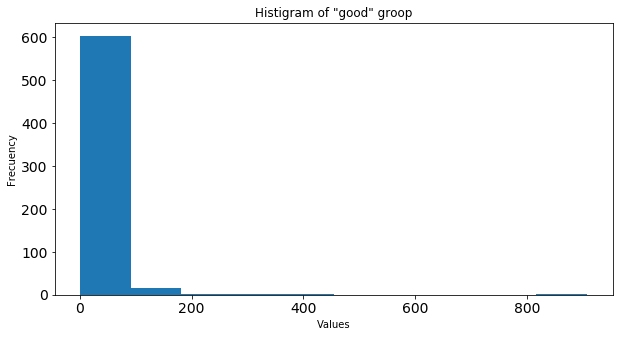

In [71]:
hist(df_dlink['good'])

In [72]:
describe(df_dlink['good'])

count    625.000000
mean      24.699074
std       50.754788
min        0.216560
25%        5.871481
50%       11.376434
75%       28.110284
max      907.984274
Name: good, dtype: float64

abnormal values >  75.03909195517026


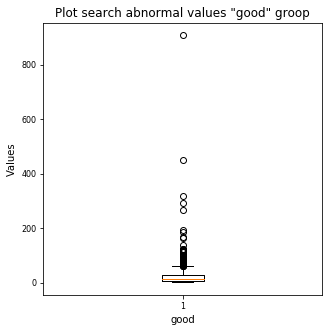

In [73]:
anomal_values(df_dlink['good'])

In [74]:
# Исследуем метрику 'Средняя скорость скачивания' группы 'bad' (абоненты не удовлетворенные качеством связи)

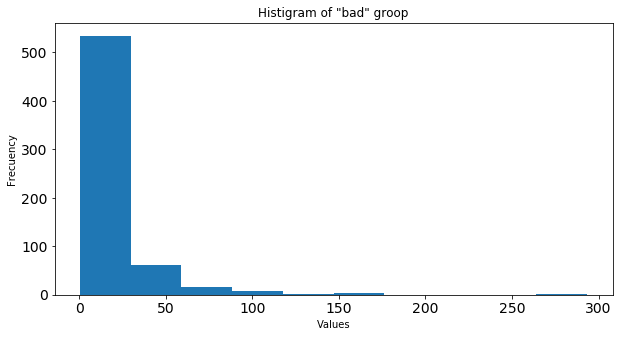

In [75]:
hist(df_dlink['bad'])

In [76]:
describe(df_dlink['bad'])

count    625.000000
mean      16.632249
std       23.313817
min        0.428955
25%        4.643731
50%        8.750804
75%       19.831971
max      293.464212
Name: bad, dtype: float64

abnormal values >  56.765711675180405


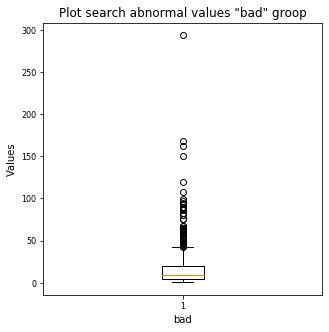

In [77]:
anomal_values(df_dlink['bad'])

In [78]:
# удалим аномальные значения в обеих группах данных
df_dlink = anom_del(df_dlink, df_dlink['good'], df_dlink['bad'])

In [79]:
# применим функцию бутстрепа так как распределение выборок несимметричное
samples_good_dlink = bootstrap(df_dlink['good'], N_TRIAL=3000, func=np.mean)
samples_bad_dlink = bootstrap(df_dlink['bad'],  N_TRIAL=3000, func=np.mean)

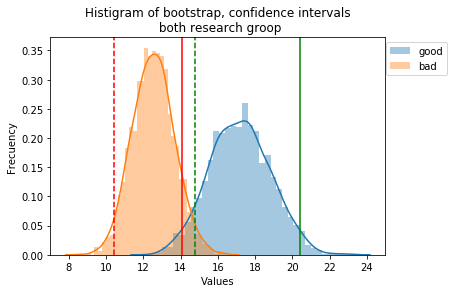

In [80]:
# построим гистограммы распределения и доверительные интервалы обеих групп
interval(samples_good_dlink, samples_bad_dlink)

min = -6.1506245423596475 max = -2.9812188407191473


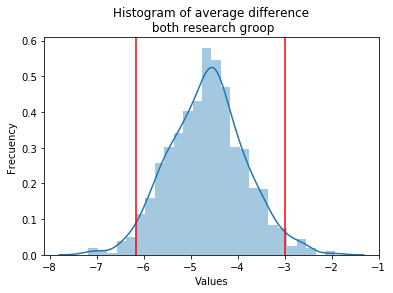

In [81]:
# График разницы средних
average_difference(df_dlink['good'], df_dlink['bad'])

In [82]:
# p_value
p_value(df_dlink['good'], df_dlink['bad'])

1.1081548384268369e-05

In [83]:
# отношение средних в группах good и bad
round(df_dlink['good'].mean()/df_dlink['bad'].mean()*100 - 100,2)

37.1

##### <font color='orange'>Доверительные интервалы выборок слабо пересекаются, , p_value = 1.1e-05 при уровне значимости 0.05. А также при разнице средних ноль не входит в доверительный интервал. Исходя из вышеизложенного следует вывод:<font>

#### <font color='orange'>Гипотеза, о том что уровень удовлетворенности качеством связи зависит от средней скорости интернета  подтверждается. Между исследуемыми группами есть статистически значимые различия. Средняя скорость интернета у абонетов удовлетворенных качеством связи выше в среднем на 37.1% , чем у абонентов, неудовлетворенных качеством связи и оставившими негативную оценку о скорости интернета<font>

#### <font color='orange'>Гипотеза 3: <font>

#### <font color='orange'>Уровень удовлетворенности качеством связи не зависит от среднего объема траффика (Total Traffic(MB)).<font>

In [84]:
df_traffic = df_metric('Total Traffic(MB)')

In [85]:
# Исследуем метрику 'объем траффика' группы 'good' (абоненты удовлетворенные качеством связи)

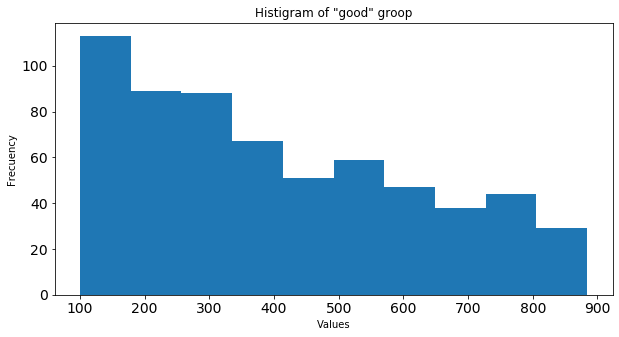

In [86]:
hist(df_traffic['good'])

In [87]:
describe(df_traffic['good'])

count    625.000000
mean     406.752651
std      220.055690
min      100.026680
25%      218.919860
50%      362.040840
75%      581.309270
max      884.193530
Name: good, dtype: float64

abnormal values >  804.179938


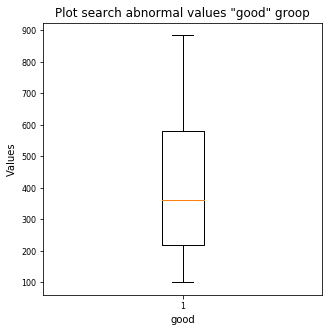

In [88]:
anomal_values(df_traffic['good'])

In [89]:
# Исследуем метрику 'объем траффика' группы 'bad' (абоненты не удовлетворенные качеством связи)

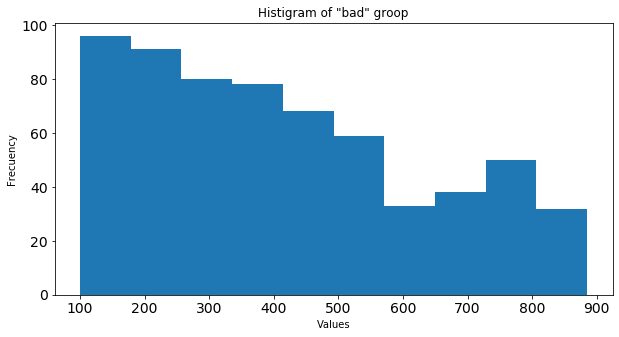

In [90]:
hist(df_traffic['bad'])

In [91]:
describe(df_traffic['bad'])

count    625.000000
mean     415.249924
std      217.210009
min      100.035380
25%      231.081070
50%      380.390560
75%      567.984070
max      885.256780
Name: bad, dtype: float64

abnormal values >  806.0818899999998


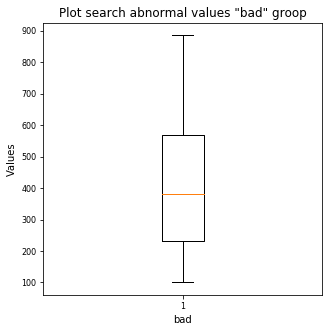

In [92]:
anomal_values(df_traffic['bad'])

In [93]:
# Аномальных значений в данных не обнаружено

In [94]:
# применим бутстреп так как распределение метрики ассиметричное  и мал размер выборок
samples_traffic_good = bootstrap(df_traffic['good'], N_TRIAL=3000, func=np.mean)
samples_traffic_bad = bootstrap(df_traffic['bad'],  N_TRIAL=3000, func=np.mean)

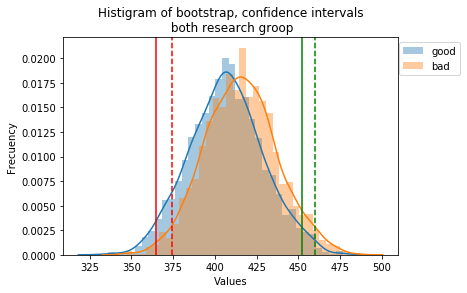

In [95]:
# построим гистограммы распределения и доверительные интервалы обеих групп
interval(samples_traffic_good, samples_traffic_bad)

min = -16.084061771200084 max = 31.709872837199978


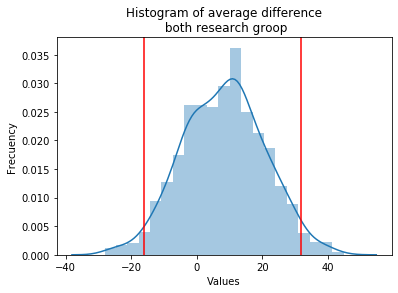

In [96]:
average_difference(df_traffic['good'], df_traffic['bad'])

In [97]:
# найдем p-value через критерий Манна-Уитни
p_value(df_traffic['good'], df_traffic['bad'])

0.2016601517706741

##### <font color='orange'>Доверительные интервалы выборок очень сильно пересекаются, , p_value = 0.071 при уровне значимости 0.05. А также при разнице средних ноль входит в доверительный интервал. Исходя из вышеизложенного следует вывод:<font>

#### <font color='orange'>Гипотеза о том что уровень удовлетворенности качеством связи не зависит от среднего объема траффика подтверждается. Между исследуемыми группами нет статистически значимых различий. Абоненты удовлетворенные качеством связи и абоненты не удовлетворенные качеством связи потребляют одинаковое количество интернет-траффика.<font>

#### <font color='yellow'>Общие результаты исследования и рекомендации:<font>

#### <font color='yellow'>В результате проведенного исследования мы выяснили, что средняя скорость интернета и средняя скорость загрузки видео сильно влияют  на уровень удовлетворенноти абонентов качеством связи. Не вляяет на уровень удовлетворенности средний обьем интернет-траффика. Данный признак является неизменным для обех групп исследования. Компании "Мегафон" необходимо уделить пристальное внимание признакам, влияющим на удовлетворенность качеством связи. Необходимо более детально изучить почему у одних абонентов показатели средней скорости интернета и скорость загрузки видео ниже  чем у других абонентов и что именно влияет на показатели этих признаков. Низкие показатели средней скорости интернета и средней скорости загрузки видео могут привести к оотоку абонентов всвязи с неудовлетворенностью качеством связи. Необходимо привести показатели данных признаков к уровню удовлетворенности абонентов, довольных качеством связи<font>

#### <font color='yellow'>Для более  полного исследования об удовлетворенноти качеством связи необходимо исследовать не только признаки, отражающие показатели интернет-соединения и его производных, но и признаки, отражающие показатели телефонной связи. Например: количество разрывов во время разговоров, время ожидания гудков при звонке, геоданные абонента. После подобного исследования у компании "Мегафон" будут все необходимые данные для принятия тех или иных управленческих решений в области удовлетворенности абонентов качеством связи.<font> 